# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

## Data Preparation

In [1]:
import pandas as pd

In [2]:
# Load the datasets
train_df = pd.read_csv('twitter_training.csv', header=None, names=['id', 'topic', 'sentiment', 'tweet'])
validation_df = pd.read_csv('twitter_validation.csv', header=None, names=['id', 'topic', 'sentiment', 'tweet'])

In [3]:
# Display the first few rows to understand the structure
print(train_df.head())
print(validation_df.head())

     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
     id      topic   sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                               tweet  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet

## Data Cleaning: removing URLs, mentions, and special characters that might not contribute to sentiment analysis.

In [4]:
import re

In [7]:
def clean_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#\w+', '', text)  # Remove hashtags (optional, as they might be relevant)
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower().strip()
    else:
        # If not a string, return empty string or possibly handle as desired
        text = ''
    return text

In [8]:
# Apply cleaning function to tweets
train_df = pd.read_csv('twitter_training.csv', header=None, names=['id', 'topic', 'sentiment', 'tweet'])
validation_df = pd.read_csv('twitter_validation.csv', header=None, names=['id', 'topic', 'sentiment', 'tweet'])

print(train_df.head())

     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


## Sentiment Analysis across different topics

In [9]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

In [10]:
# Combine datasets for overall analysis
combined_df = pd.concat([train_df, validation_df])

In [11]:
# Count sentiments per topic
sentiment_counts = combined_df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)

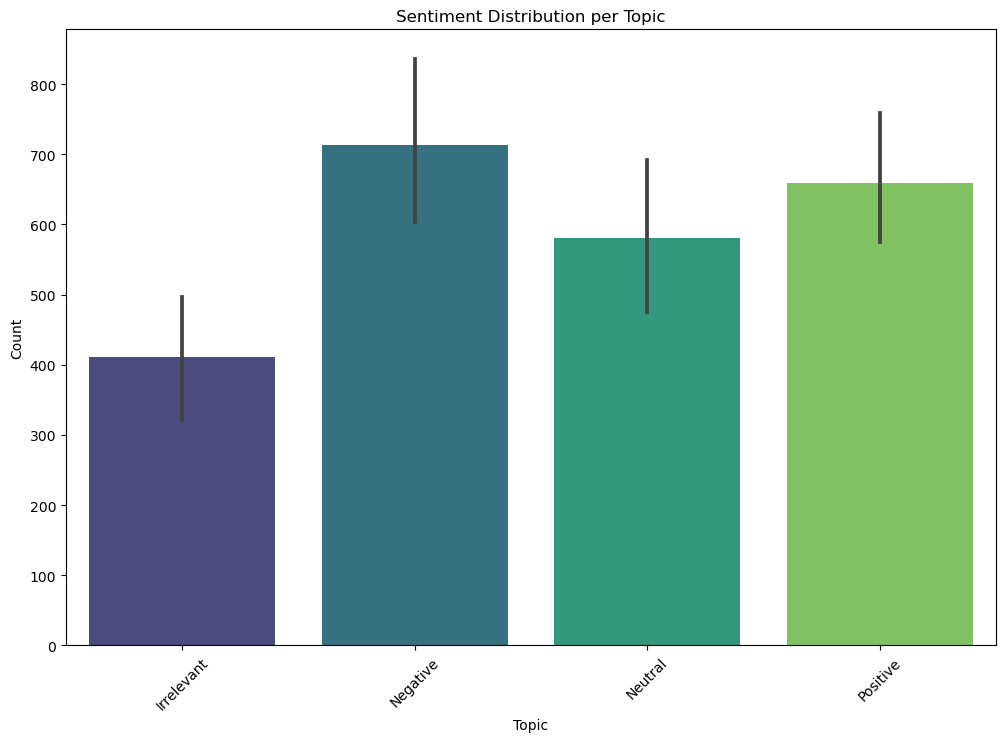

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(data=sentiment_counts, palette='viridis')
plt.title('Sentiment Distribution per Topic')
plt.ylabel('Count')
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.show()

## Overall Sentiment Analysis

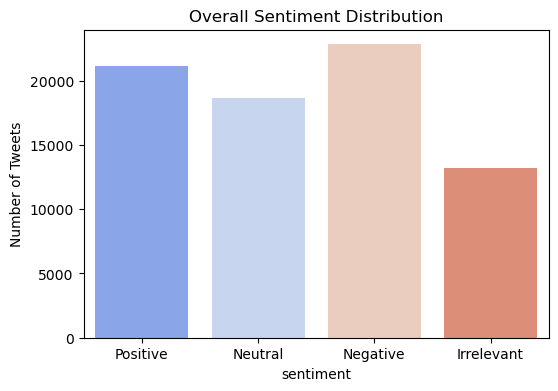

In [15]:
# Overall sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df, x='sentiment', palette='coolwarm')
plt.title('Overall Sentiment Distribution')
plt.ylabel('Number of Tweets')
plt.show()

## Word Frequency Analysis: To better understand the context behind the sentiments, a word frequency analysis can highlight common terms in positive vs. negative tweets.

In [17]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 163.6 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/300.2 kB 178.6 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/300.2 kB 178.6 kB/s eta 0:00:02
   --------- ----------------------------- 71

In [19]:
from wordcloud import WordCloud

In [21]:
# Ensure all tweets are of string type and not NaN
train_df['tweet'] = train_df['tweet'].astype(str)

# Filter out positive tweets and join them into one large string
positive_tweets = ' '.join(train_df[train_df['sentiment'] == 'Positive']['tweet'])

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

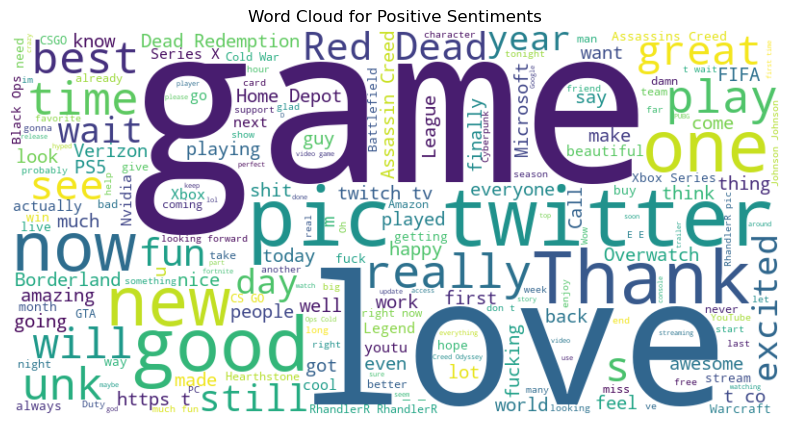

In [23]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.title('Word Cloud for Positive Sentiments')
plt.show()